# <b>Prediction of Winner using ML Algorithms</b>
---

<img src='https://i.postimg.cc/fbCgv6cZ/India-2019-elections.jpg'/>

In [1]:
# Importing all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

---
## For analysis and insights on this dataset visit <a href="https://github.com/anurag-ux/2019-general-election/blob/master/Analysis.ipynb">here</a> 

---
# <b> Table of Contents</b>
- Dataset Overview
- Data Preprocessing
- Handling missing values
- Managing categorical values
- Final overview before modelling data
- Learning and Predicting
- Checking the accuracy of our model
- Hyperparameter tunning
- Selecting best model

---
### <b> Brief Overview of Dataset</b>.

In [2]:
# Importing Data File
election_data = pd.read_csv('https://raw.githubusercontent.com/akkysanap22/General-Election-2019/master/LS_2.0.csv')

In [3]:
#election_data=election_data[election_data['PARTY']!='NOTA']
election_data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


---
### <b> Data Preprocessing
---

In [4]:
# removing non-essential columns
election_data.drop(['STATE','CONSTITUENCY', 'NAME','SYMBOL','GENERAL\nVOTES','TOTAL\nVOTES' ,'POSTAL\nVOTES', 'OVER TOTAL ELECTORS \nIN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1,inplace=True) 

In [5]:
election_data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL\nCASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL ELECTORS'],
      dtype='object')

In [6]:
## cleaning data for assets column
election_data['ASSETS'].replace(['Not Available','Nil',np.nan,'`','Telangana'],'0',inplace=True)
a=election_data['ASSETS'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
election_data['ASSETS']=c
election_data['ASSESTS']=election_data['ASSETS'].astype(float)

## cleaning data for liabilities column
election_data['LIABILITIES'].replace(['Not Available','Nil','NIL',np.nan,'`','Telangana'],'0',inplace=True)
a=election_data['LIABILITIES'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
election_data['LIABILITIES']=c
election_data['LIABILITIES']=election_data['LIABILITIES'].astype(int)

In [7]:
# renaming some columns (duh!)
election_data.columns=['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY','EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS','ASSESTS']

---
### <b> Handling missing values
---

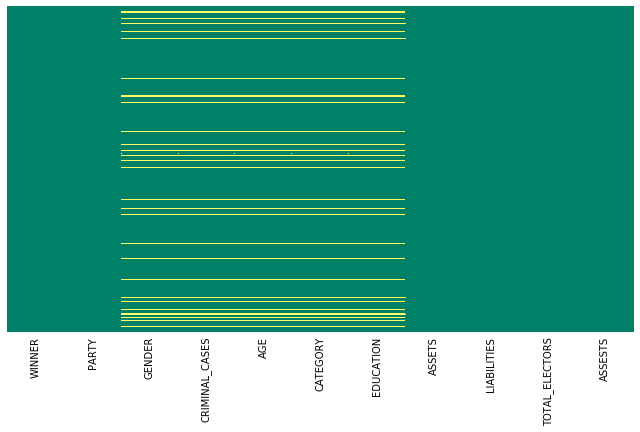

In [8]:
# visualizing the columns with null values
plt.figure(figsize=(10,6))
sns.heatmap(election_data.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show()

In [9]:
# checking the number of null values in each feature
election_data.isnull().sum()

WINNER              0
PARTY               0
GENDER            245
CRIMINAL_CASES    245
AGE               245
CATEGORY          245
EDUCATION         245
ASSETS              0
LIABILITIES         0
TOTAL_ELECTORS      0
ASSESTS             0
dtype: int64

* We see that there is a strong chance that some rows have missing data in many features
* Even if we try to fill the data for numerical values such as criminal cases, it is not possible to predict the gender or the cateogry of a candidate
* Also our dataset has nearly 2200 rows so it is feasible to drop 245 rows for better working of our model

In [10]:
# dropping the null values
election_data.dropna(inplace=True)
election_data.isnull().sum()

WINNER            0
PARTY             0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
ASSETS            0
LIABILITIES       0
TOTAL_ELECTORS    0
ASSESTS           0
dtype: int64

In [11]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 11 columns):
WINNER            2018 non-null int64
PARTY             2018 non-null object
GENDER            2018 non-null object
CRIMINAL_CASES    2018 non-null object
AGE               2018 non-null float64
CATEGORY          2018 non-null object
EDUCATION         2018 non-null object
ASSETS            2018 non-null object
LIABILITIES       2018 non-null int32
TOTAL_ELECTORS    2018 non-null int64
ASSESTS           2018 non-null float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 181.3+ KB


In [12]:
### Noticed that the criminal cases feature has 'Not Available' value which would give an error while training our data
election_data['CRIMINAL_CASES']=election_data['CRIMINAL_CASES'].apply(lambda x:0 if x=='Not Available' else x)

---
### <b> Managing categorical values
---

In [13]:
# we have the following categorical features in our dataset
election_data[['PARTY','GENDER','CATEGORY','EDUCATION']].head()

,PARTY,GENDER,CATEGORY,EDUCATION
0,BJP,MALE,ST,12th Pass
1,TRS,MALE,ST,Post Graduate
2,INC,MALE,ST,12th Pass
4,BJP,MALE,SC,Doctorate
5,BSP,MALE,SC,Post Graduate


* Lets focus on the PARTY feature and take a look how many categories are there in the dataset

In [14]:
election_data['PARTY'].value_counts()

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
         ... 
BJKVP       1
RSOSP       1
NAWPP       1
KEC         1
BVA         1
Name: PARTY, Length: 132, dtype: int64

* As we see there are more than 130 parties. we can map all the parties with less than 10 candidates as 'Others'

In [15]:
election_data['PARTY']=election_data['PARTY'].apply(lambda x:x if election_data['PARTY'].value_counts().loc[x]>10 else 'Others')
election_data['PARTY'].value_counts()

BJP       420
INC       413
Others    251
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
MNM        36
SHS        26
AAP        25
YSRCP      25
TDP        25
DMK        23
NCP        21
BJD        21
AIADMK     21
RJD        21
JnP        20
JD(U)      18
TRS        17
Name: PARTY, dtype: int64

* lets look at the education feature and see what can be done

In [16]:
election_data['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

* for better working of our model lets merge some values

In [17]:
election_data.drop('ASSETS',axis=1,inplace=True)
ill=['Others','Not Available','Illiterate','Post Graduate\n']
election_data['EDUCATION']=election_data['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
election_data['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
Illiterate                78
8th Pass                  78
Doctorate                 73
Literate                  30
5th Pass                  28
Name: EDUCATION, dtype: int64

In [18]:
election_data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,LIABILITIES,TOTAL_ELECTORS,ASSESTS
0,1,BJP,MALE,52,52.0,ST,12th Pass,231450,1489790,3099414.0
1,0,TRS,MALE,0,54.0,ST,Post Graduate,847000,1489790,18477888.0
2,0,INC,MALE,3,52.0,ST,12th Pass,15300000,1489790,36491000.0
4,1,BJP,MALE,5,58.0,SC,Doctorate,8606522,1937690,74274036.0
5,0,BSP,MALE,0,47.0,SC,Post Graduate,22251891,1937690,133784385.0


* Now that we have cleaned our categorical features we need to convert them into dummy values and merge them into our dataframe for the algorithm to recognize them.

In [19]:
dummy=pd.get_dummies(election_data[['GENDER','CATEGORY','PARTY','EDUCATION']],drop_first=True)
feature_data=pd.concat([election_data,dummy],axis=1)

In [20]:
feature_data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,LIABILITIES,TOTAL_ELECTORS,ASSESTS,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,BJP,MALE,52,52.0,ST,12th Pass,231450,1489790,3099414.0,...,0,1,0,0,0,0,0,0,0,0
1,0,TRS,MALE,0,54.0,ST,Post Graduate,847000,1489790,18477888.0,...,0,0,0,0,0,0,0,0,0,1
2,0,INC,MALE,3,52.0,ST,12th Pass,15300000,1489790,36491000.0,...,0,1,0,0,0,0,0,0,0,0
4,1,BJP,MALE,5,58.0,SC,Doctorate,8606522,1937690,74274036.0,...,0,0,0,0,1,0,0,0,0,0
5,0,BSP,MALE,0,47.0,SC,Post Graduate,22251891,1937690,133784385.0,...,0,0,0,0,0,0,0,0,0,1


* Now we drop our previous categorical columns

In [21]:
feature_data.drop(['PARTY','GENDER','CATEGORY','EDUCATION'],axis=1,inplace=True)

###### '
---
### <b> Now that we have pre-processed our data for the machine learning algorithm lets take a final look at it

In [22]:
feature_data

,WINNER,CRIMINAL_CASES,AGE,LIABILITIES,TOTAL_ELECTORS,ASSESTS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,52,52.0,231450,1489790,3.099414e+06,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,54.0,847000,1489790,1.847789e+07,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,52.0,15300000,1489790,3.649100e+07,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,5,58.0,8606522,1937690,7.427404e+07,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,47.0,22251891,1937690,1.337844e+08,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0,0,28.0,9000,1916185,1.168500e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2258,0,0,43.0,1020000,1916185,4.890000e+06,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2259,1,18,63.0,11535000,1498666,1.287852e+09,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2260,0,0,49.0,0,1498666,9.036630e+08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


----
### <b>  Learning and Predicting

---
* First we break our data into the design matrix X and output vector y

In [23]:
data=feature_data.copy()

In [24]:
X=data.drop('WINNER',axis=1)
y=data.WINNER

* now we spluniqueour data for training and testing

In [25]:
### we'll keep 75% of our data for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

* Scaling our data to standard normal distribution

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
election_data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'LIABILITIES', 'TOTAL_ELECTORS', 'ASSESTS'],
      dtype='object')

* <b> Model Training

In [28]:
seed = 7
scoring = 'accuracy'

In [29]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [30]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.851277 (0.026391)
K-NN: 0.846689 (0.026550)
DT: 0.781923 (0.030510)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF: 0.827470 (0.016301)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[Text(0, 0, 'LR'), Text(0, 0, 'K-NN'), Text(0, 0, 'DT'), Text(0, 0, 'RF')]

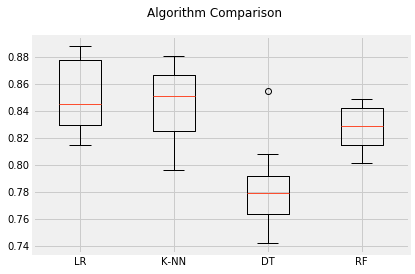

In [48]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### <b> From above box plot we can see, the logistic regression have best accurancy around 85%.

In [88]:
lr = LogisticRegression()
lr.fit(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = lr.predict(X_test)

In [96]:
confusion_matrix_lr = confusion_matrix(y_pred=y_pred, y_true=y_test)

* <b> Confusion Matrix for Logistic Regression algorithm 

In [97]:
confusion_matrix_lr

array([[339,  34],
       [ 30, 102]], dtype=int64)

### <b> classification Report

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       373
           1       0.75      0.77      0.76       132

    accuracy                           0.87       505
   macro avg       0.83      0.84      0.84       505
weighted avg       0.87      0.87      0.87       505



### Our Model have an accurancy of <b> 87 % 

---
# <b> Improving Model Accurancy Furthur 
----

### <b> Checking Whether data set is balanced or imbalanced </b>

In [43]:
data.WINNER.value_counts()

0    1479
1     539
Name: WINNER, dtype: int64

* <b> 0 - 74 %
* <b> 1 - 26 %

### <b> UP - Sampling to Make Dataset Balanced

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
sampler = RandomOverSampler()

In [52]:
feature_s, target_s = sampler.fit_sample(X,y)

In [53]:
feature_s.shape

(2958, 39)

In [54]:
pd.Series(target_s).value_counts()

1    1479
0    1479
dtype: int64

* <b> Balanced Dataset

In [55]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, trainX, trainY, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.569854 (0.033805)
K-NN: 0.664557 (0.020559)
DT: 0.885946 (0.020499)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF: 0.911646 (0.019499)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# <b> Best Model Selection </b>

[Text(0, 0, 'LR'), Text(0, 0, 'K-NN'), Text(0, 0, 'DT'), Text(0, 0, 'RF')]

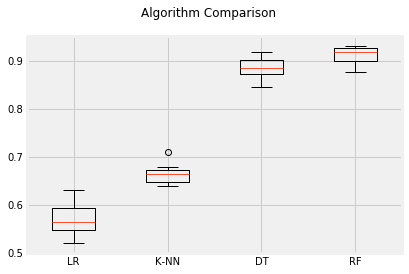

In [57]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### <b> From above box plot we can see, the Random Forest Classifier have best accurancy around 93%.

* Now we have succesfully trained and predicted values for our data so lets check how well the algorithm performed

In [69]:
RF = RandomForestClassifier()
RF.fit(trainX,trainY)
predict=RF.predict(testX)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###### `
---
## Checking the accuracy of our model (using k-fold cross validation)

In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = trainX, y = trainY, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.35 %
Standard Deviation: 2.24 %


## <b> HyperParameter Tunning

### <b> Applying GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV
#parameters = [{n_estimators: [100,200,300,400,500]}]
grid_search = GridSearchCV(RF,param_grid={'n_estimators':[10,50,100,200], 'max_depth':[10,20,None]}, cv = 10 ,n_jobs = 4)
                          
grid_search = grid_search.fit(trainX, trainY)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print('Best estimator: \n\t'+str(grid_search.best_estimator_))

Best Accuracy: 92.29 %
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best estimator: 
	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


* <b> Confusion Matrix For Random Forest

In [102]:
y_pred = RF.predict(testX)

In [103]:
confusion_matrix_RF = confusion_matrix(y_pred=y_pred, y_true=testY)

In [104]:
confusion_matrix_RF

array([[338,  30],
       [ 25, 347]], dtype=int64)

### <b> Classification Report

In [95]:
from sklearn.metrics import classification_report
print(classification_report(testY,predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       368
           1       0.92      0.93      0.93       372

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



## Great!! Our model has an accuracy of <b> 93 %
---

---
# <b> Thanks For Your Time .....!!
---